# Trabalho: Indústria dos Games 
### Disciplina: Introdução a Data Science com Python
### Autores: Alan Gayger e Pedro Werneck

- Objetivo do Trabalho - apresentar a indústria dos games e analisar tendências através dos dados.
- Base de dados utilizada: Video_Games_Sales_as_at_22_Dec_2016 (Kaggle).


- Estrutura do Trabalho:
    - História da Indústria:
        - Títulos por Ano 
        - Vendas por Publisher 
        - Vendas por Publisher ao Ano
    - Análise Regional:
        - 10 Mais Vendidos 
        - 10 Mais Vendidos por Região 
        - Vendas por Gênero
        - Títulos por Gênero 
        - Vendas por Região por Gênero

## Exploração dos dados 

In [1]:
## Importando pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import bar_chart_race as bcr
import ffmpeg

In [2]:
#Lendo o arquivo csv no pandas
games_dados = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games_dados.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#verificar porcentagem de dados que faltam e dimensões da base
print(f'Dimensão da base de dados: {games_dados.shape}')
print(f'Porcentagem faltando (sem dados das últimas colunas): {games_dados.drop(columns=["Critic_Score", "Critic_Count", "User_Score", "User_Count", "Developer", "Rating"]).isnull().sum().sum() / np.product(games_dados.shape)}.')
print(f'Porcentagem faltando (com dados das últimas colunas): {games_dados.isnull().sum().sum() / np.product(games_dados.shape)}.')
#poucos dados faltando quando se descartam os valores do Metacritic

Dimensão da base de dados: (16719, 16)
Porcentagem faltando (sem dados das últimas colunas): 0.0012224116274896825.
Porcentagem faltando (com dados das últimas colunas): 0.1746366409474251.


In [4]:
#Quantidade de dados faltantes em cada categoria 
games_dados.isnull().sum() 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

# Limpezas dos dados 

In [5]:
#verificando e descartando jogo sem nome
games_dados = games_dados.drop(games_dados[games_dados.Name.isnull()].index)
games_dados.isnull().sum()

Name                  0
Platform              0
Year_of_Release     269
Genre                 0
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8580
Critic_Count       8580
User_Score         6702
User_Count         9127
Developer          6621
Rating             6767
dtype: int64

In [6]:
#preenchendo NaN de variáveis categóricas com 'Unknown'
games_dados[['Name', 'Genre', 'Publisher', 'Developer', 'Rating']] = games_dados[['Name', 'Genre', 'Publisher', 'Developer', 'Rating']].fillna('Unknown')

In [7]:
#verificando jogos sem dados de ano de lançamento
#não retirar jogos sem o registro do ano de lançamento, pois dentre eles há títulos com muitas vendas
games_dados[games_dados['Year_of_Release'].isnull()].sort_values(by='Global_Sales', ascending=False).iloc[:10]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23,94.0,29.0,8.5,140.0,EA Tiburon,E
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49,84.0,20.0,6.4,76.0,EA Canada,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.80,0.97,0.00,0.29,3.06,74.0,17.0,7.9,22.0,Traveller's Tales,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,Unknown,Unknown
609,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53,NaN,NaN,NaN,NaN,Unknown,Unknown
627,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.33,0.00,0.21,2.47,92.0,72.0,8.2,178.0,Harmonix Music Systems,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,Konami Digital Entertainment,2.15,0.18,0.00,0.07,2.39,73.0,4.0,tbd,NaN,Konami Computer Entertainment Hawaii,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,LucasArts,1.51,0.61,0.00,0.21,2.34,78.0,22.0,6.6,28.0,Traveller's Tales,E10+
719,Call of Duty 3,Wii,NaN,Shooter,Activision,1.17,0.84,0.00,0.23,2.24,69.0,42.0,6.7,61.0,Exakt,T
805,Rock Band,Wii,NaN,Misc,MTV Games,1.33,0.56,0.00,0.20,2.08,80.0,21.0,6.3,37.0,Harmonix Music Systems,T


# Visualizações 

In [8]:
#quantidade de jogos
print('Quantidade total de valores não repetidos:')
for categoria in ['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']:
    print(f'{categoria}: {len(games_dados.loc[:,categoria].unique())}')
#poucas plataformas e gêneros, mas número incrível de Publishers e Developers

Quantidade total de valores não repetidos:
Name: 11562
Platform: 31
Genre: 12
Publisher: 581
Developer: 1697
Rating: 9


In [9]:
sns.set_palette('Wistia_r')

# História da Indústria

In [10]:
#descarta nomes repetidos, mantendo dados relativos à primeira repetição do nome (preparação para plot das publishers, gêneros e anos)
#preparação necessária para evitar "inflação" de quantidades de jogos
games_nomes_unicos = games_dados.sort_values(by='Name').drop_duplicates(subset='Name', keep='first').sort_values(by='Global_Sales', ascending=False)
games_nomes_unicos.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,Unknown,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,Unknown,Unknown


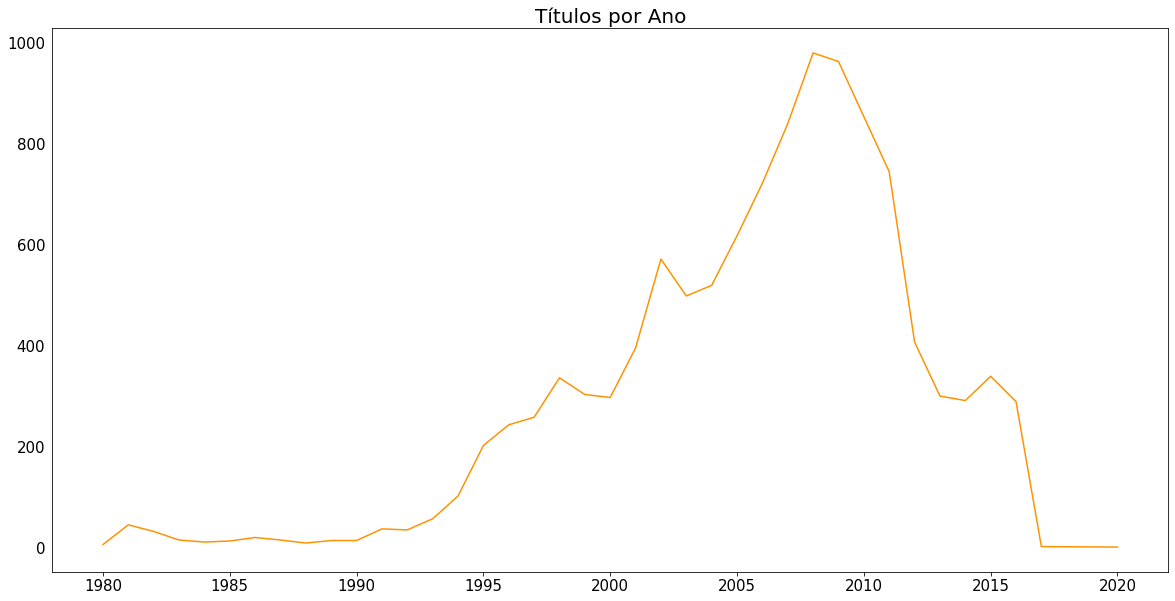

In [11]:
#títulos por ano

ano_titulos = games_nomes_unicos['Year_of_Release'].value_counts().sort_index()

plt.figure(figsize=(20,10))
x_rotulo, titulo = 'Ano', 'Títulos por Ano'
tamanho_titulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto = 20, 15, 15, 15

sns.lineplot(data=ano_titulos).set_ylabel('')

plt.title(titulo, fontsize=tamanho_titulo)
#plt.axes().spines['right'].set_visible(False)
#plt.axes().spines['top'].set_visible(False)
plt.tick_params(axis='x', labelsize=tamanho_x_texto) 
plt.tick_params(axis='y', labelsize=tamanho_y_texto, left=False)
#plt.xlabel(x_rotulo, fontsize=tamanho_x_rotulo)

- Observações:
    - Observando-se o gráfico, é possível perceber as principais tendências pelas quais a indústria passou em sua história:
        - 1980 - 1990 - nesse período ocorreu o início da indústria, com os primeiros consoles sendo lançados e os jogos començando a adentrar os lares mundo a fora; 
        - 1990 - 2010 - nesses anos, o setor acelerou-se devido a maior penetração da tecnologia no âmbito doméstico, contando com grandes plataformas como PS2, XBOX 360 e Nintendo Wii; 
        - 2010 - 2015 - nesse momento, a indústria sofreu uma desaceleração devido à transição para 8ª geração de consoles (PS4, XBOX ONE e Wii U), a qual levou a altos custos de produção, maior concentração de recursos na produção de cada jogo e diminuição dos lucros. Além disso, é válido citar uma possível defasagem na base de dados, uma vez que a diminuição no lançamento de novos títulos pode não ter sido tão expressiva; 
        - 2015 - 2020, nessa janela de tempo, a queda presente no gráfico ocorre devido a imperfeição nos dados, uma vez que a base só foi atualizada até 2016.

In [12]:
def PlotaBasicos(dados, titulo, tamanho_titulo, x_rotulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto):
    plt.figure(figsize=(20,8))
    plt.axes().spines['right'].set_visible(False)
    plt.axes().spines['top'].set_visible(False)
    sns.barplot(y=dados.index, x=dados, palette='Wistia_r')
    
    # formtatando rótulos, títulos e tamanhos de texto
    plt.tick_params(axis='x', labelsize=tamanho_x_texto)
    plt.tick_params(axis='y', labelsize=tamanho_y_texto, left=False)
    plt.title(titulo, fontsize=20)
    plt.xlabel(x_rotulo, fontsize=tamanho_x_rotulo)
    plt.ylabel('')
 

<ipython-input-12-b2e874573c6f>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines['top'].set_visible(False)


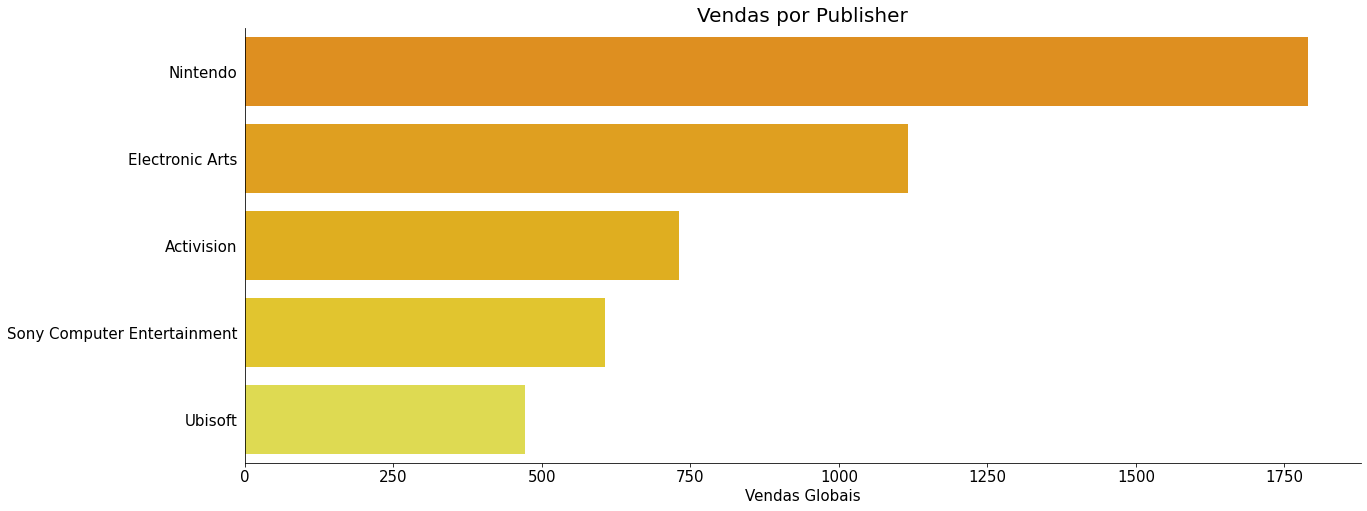

In [13]:
# vendas globais por Publisher
publishers = games_dados.groupby('Publisher').Global_Sales.sum().sort_values(ascending=False).iloc[:5]
PlotaBasicos(publishers, 'Vendas por Publisher', 20, 'Vendas Globais', 15, 15, 15)

In [14]:
def PlotaBasicosPublisher(regiao, coluna, espaco_horizontal_eixos, espaco_vertical_eixos, titulo, tamanho_titulo, x_rotulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto):
    fig, ax = plt.subplots(3, 2, figsize=(20,10)) #criando 3 figuras com 2 eixos cada
    plt.subplots_adjust(wspace=espaco_horizontal_eixos, hspace=espaco_vertical_eixos) #ajustando espaço horizontal entre eixos
    
    for i, j, empresa in [(0, 0, 'Nintendo'), (0, 1, 'Electronic Arts'), (1, 0, 'Activision'), (1, 1, 'Sony Computer Entertainment'), (2, 0, 'Ubisoft'), (2, 1, 'Agregado')]:
        if empresa != 'Agregado':
            vendas_ano = games_dados.groupby(coluna)[regiao].sum().sort_values().loc[empresa]
            sns.lineplot(data=vendas_ano,ax=ax[i][j], palette='Wistia_r')
        ax[i][j].set_xlim(1980, 2020) #deixar gráficos na mesma escala
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel(empresa, fontsize=tamanho_x_rotulo)
        ax[i][j].tick_params(axis='x', labelsize=tamanho_x_texto)
        ax[i][j].tick_params(axis='y', labelsize=tamanho_y_texto, left=False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
    
    vendas_ano = games_dados.groupby(coluna)[regiao].sum().sort_values().loc[['Electronic Arts','Activision','Ubisoft','Nintendo','Sony Computer Entertainment']].reset_index()
    sns.lineplot(x = 'Year_of_Release', y = 'Global_Sales', hue = 'Publisher', data = vendas_ano, ax=ax[2][1])
    ax[2][1].set_ylabel('')
    
    fig.suptitle(titulo, fontsize=tamanho_titulo)

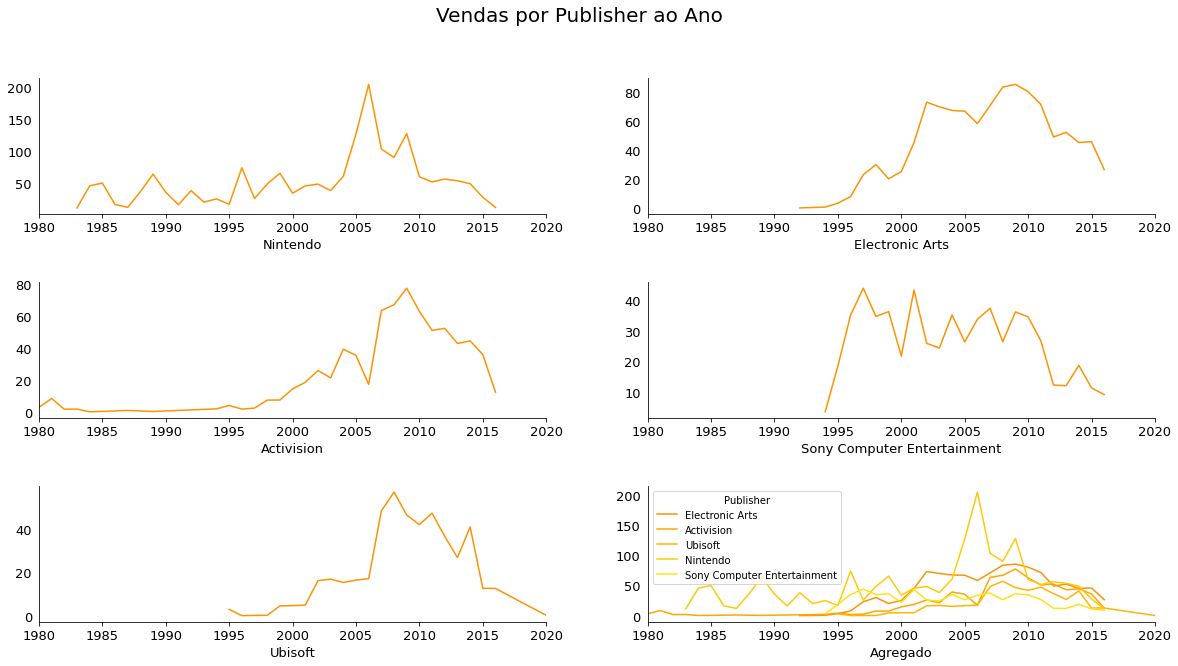

In [15]:
titulo, coluna, regiao = 'Vendas por Publisher ao Ano', ['Publisher', 'Year_of_Release'], 'Global_Sales'
tamanho_titulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto, espaco_horizontal_eixos, espaco_vertical_eixos = 20, 13, 13, 13, 0.2, 0.5
PlotaBasicosPublisher(regiao, coluna, espaco_horizontal_eixos, espaco_vertical_eixos, titulo, tamanho_titulo, x_rotulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto)

- Observações:
    - Analisando-se as vendas das cinco maiores publishers de jogos eletrônicos (empresas que publicam os games), é possível dividí-las em dois grupos:
        - Veteranas - nesse conjunto, encontram-se Nintendo e Activision, as quais entraram no setor ainda na década de 1980 criando os primeiros games para videogames domésticos;
        - Modernas - nesse grupo, são reunidas EA, Ubisoft e Sony, as quais surgiram junto com o boom da indústria, iniciando as suas histórias em um período em que os jogos já estavam tornando-se cada vez mais robustos e complexos.
    - Pontuações extras - observando-se o eixo dos gráficos agregados, é perceptível que a Nintendo tem um pico em torno de 2005, representando o sucesso do Nintendo Wii, o qual além de ser um sucesso de vendas como console, tinha jogos que vinham com o próprio videogame, impulsionando ainda mais as vendas dos títulos.
  

# Análise Regional

<ipython-input-12-b2e874573c6f>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines['top'].set_visible(False)


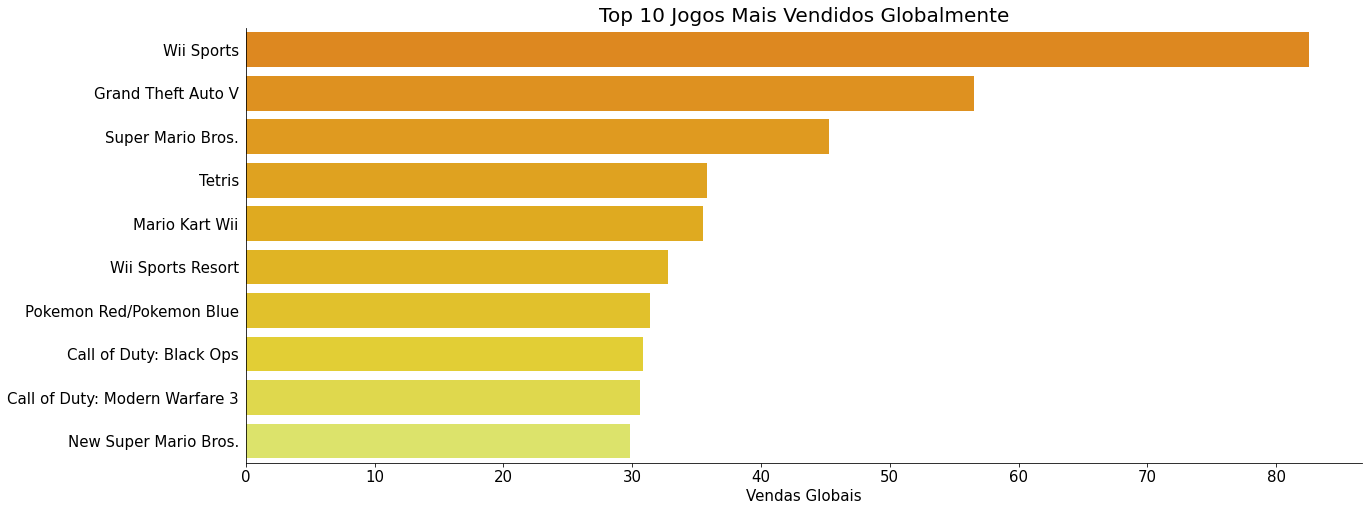

In [16]:
#top 10 jogos mais vendidos globalmente
games_dados_vendas = games_dados.groupby('Name').Global_Sales.sum().sort_values(ascending=False).iloc[:10]
PlotaBasicos(games_dados_vendas, 'Top 10 Jogos Mais Vendidos Globalmente', 20, 'Vendas Globais', 15, 15, 15)

- Observações:
    - Observando-se as vendas dos dez jogos mais vendidos globalmente, é possível perceber a diversidade entre os títulos mais populares do mundo. Somente nas três primeiras posições, figuram obras como Wii Sports (família e descontração), GTA V (aventura e simulação de mundo aberto) e Super Mario Bros (plataforma). Considerando-se a variedade não só em relação a esses títulos, mas também aos outros jogos presentes no gráfico, pode-se concluir que a indústria dos games é bastante diversificada e que ela tem espaço para múltiplos nichos de consumo.

In [17]:
def PlotaBasicosRegiao(coluna, espaco_horizontal_eixos, titulo, tamanho_titulo, x_rotulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto):
    fig, ax = plt.subplots(2, 2, figsize=(20,10)) #criando 2 figuras com 2 eixos cada
    plt.subplots_adjust(wspace=espaco_horizontal_eixos) #ajustando espaço horizontal entre eixos

    for i, j, regiao in [(0, 0, 'NA_Sales'), (0, 1, 'EU_Sales'), (1, 0, 'JP_Sales'), (1, 1, 'Other_Sales')]:
        games_dados_vendas = games_dados.groupby(coluna)[regiao].sum().sort_values(ascending=False).iloc[:10]
        sns.barplot(y=games_dados_vendas.index, x=games_dados_vendas, ax=ax[i][j], palette='Wistia_r')
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel(regiao, fontsize=tamanho_x_rotulo)
        ax[i][j].tick_params(axis='x', labelsize=tamanho_x_texto)
        ax[i][j].tick_params(axis='y', labelsize=tamanho_y_texto, left=False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)

    fig.suptitle(titulo, fontsize=tamanho_titulo)

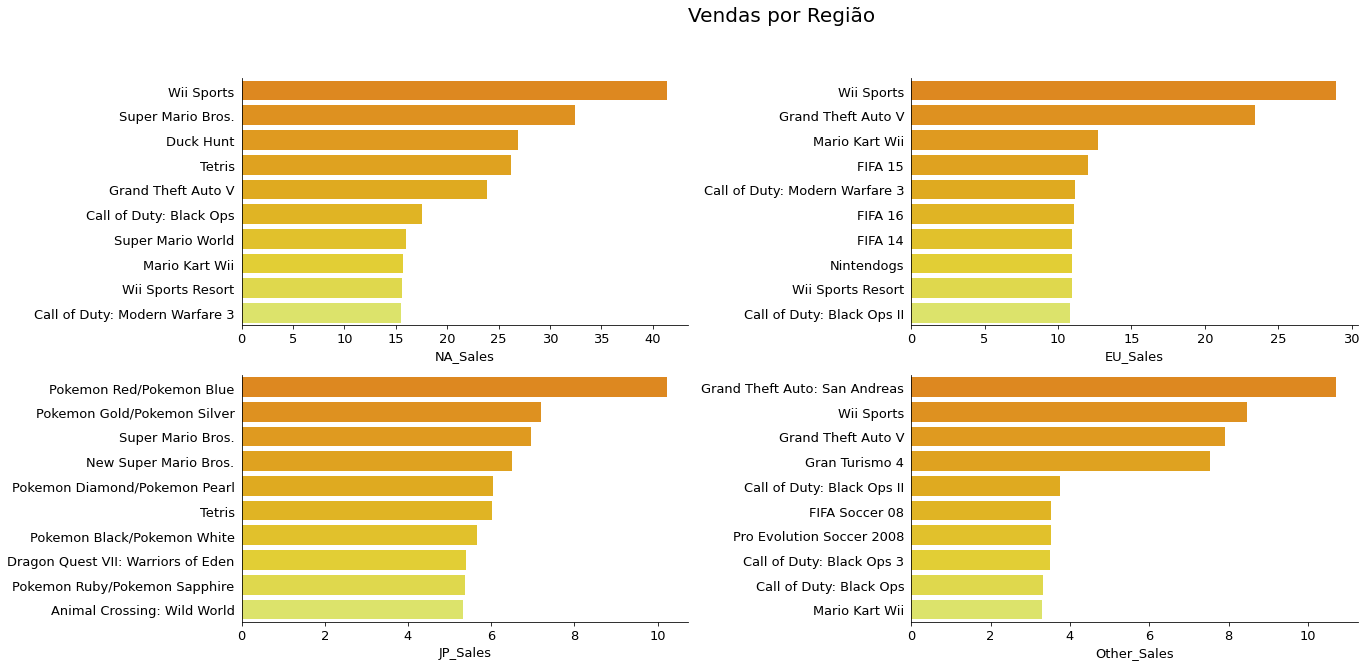

In [18]:
titulo, coluna = 'Vendas por Região', 'Name'
tamanho_titulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto, espaco_horizontal_eixos = 20, 13, 13, 13, 0.5
PlotaBasicosRegiao(coluna, espaco_horizontal_eixos, titulo, tamanho_titulo, x_rotulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto)

- Observações:
    - Analisando-se as vendas dos dez jogos mais populares por região do globo, pode-se observar algumas tendências para cada mercado:
        - Homogeneidade em EUA, Europa e Other - nesses mercados, estão presentes em peso títulos como Wii Sports, Mario, GTA, Call of Dutty, entre outros. Assim, percebe-se uma certa similaridade nas vendas nessas regiões;
        - Força do gênero esporte em Europa e Other - nessas regiões, os jogos de esporte destacam com obras como FIFA e Pro Evolution Soccer no futebol e Grand Turismo na corrida;
        - Força da Nintendo no Japão - o caso japonês representa tendências bastante dissemelhantes em relação aos das outras regiões. No país, predominam jogos direcionados para consoles de mesa e portáteis da Nintendo, destacando-se obras como Pokemon, Dragon Quest e Mario.

<ipython-input-12-b2e874573c6f>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines['top'].set_visible(False)


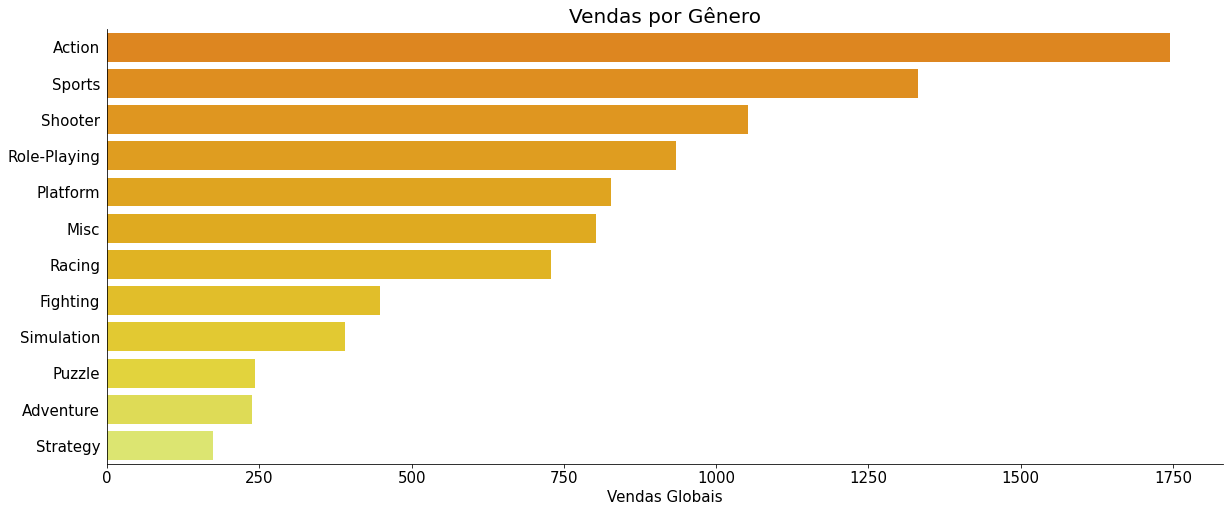

In [19]:
#Analisando o número total de vendas de cada genêro
Vendas_por_genero = games_dados.groupby('Genre').Global_Sales.sum().sort_values(ascending=False)
PlotaBasicos(Vendas_por_genero, 'Vendas por Gênero', 20, 'Vendas Globais', 15, 15, 15)

<ipython-input-12-b2e874573c6f>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines['top'].set_visible(False)


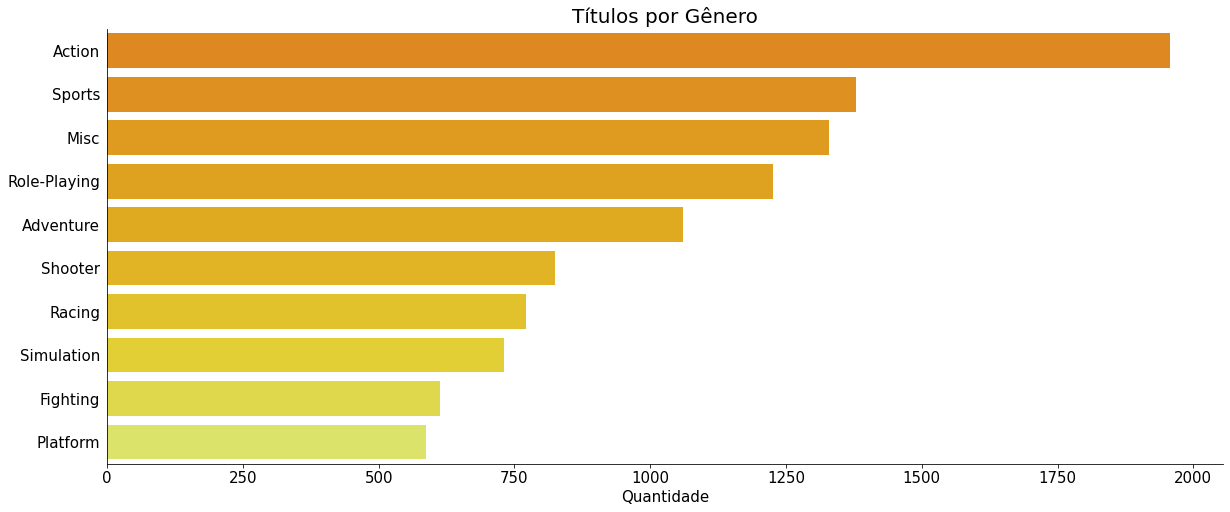

In [20]:
#títulos por gênero
top_generos = games_nomes_unicos.groupby('Genre').Genre.count().sort_values(ascending=False).iloc[:10]
PlotaBasicos(top_generos, 'Títulos por Gênero', 20, 'Quantidade', 15, 15, 15)

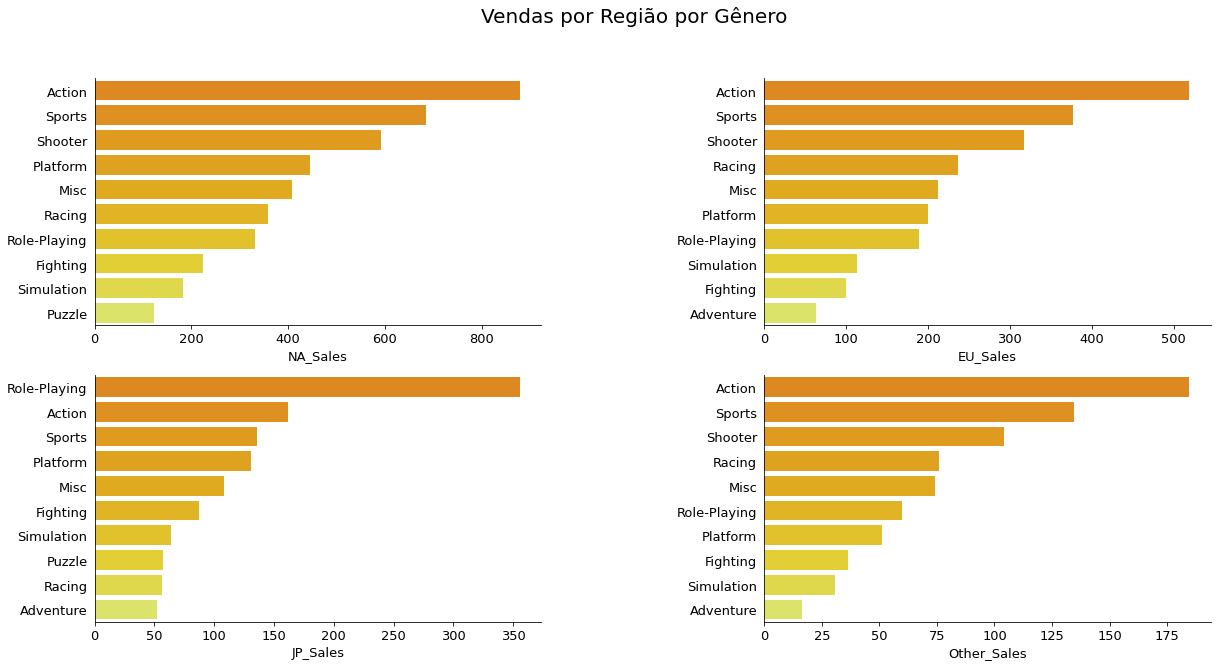

In [21]:
titulo, coluna = 'Vendas por Região por Gênero', 'Genre'
tamanho_titulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto = 20, 13, 13, 13
tamanho_titulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto, espaco_horizontal_eixos = 20, 13, 13, 13, 0.5
PlotaBasicosRegiao(coluna, espaco_horizontal_eixos, titulo, tamanho_titulo, x_rotulo, tamanho_x_rotulo, tamanho_x_texto, tamanho_y_texto)

- Observações:
    - Através da observação dos gráficos de vendas por gênero por região, é possível realizar algumas constatações:
        - Força dos jogos de ação, esporte e tiro nos EUA, Europa e Other - esses dados confirmam o sucesso de jogos como GTA (ação), FIFA (esporte) e Call of Dutty (tiro) nesses mercados, além de indicar que os EUA também são um grande consumidor de títulos de esporte (o que não era possível verificar através do gráfico de títulos mais vendidos por região); 
        - Força do Role-Playing (RPG) no Japão - tal configuração relaciona-se à popularidade dos consoles da Nintendo na região, os quais conta com RPGs de grande sucesso, como Pokemon e Dragon Quest.